In [1]:
import pandas as pd
df=pd.read_csv("copper.csv")
df

C:\Users\aditi\AppData\Local\Temp\ipykernel_8324\1456819502.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("copper.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [2]:
#number of null values in each column
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2461f7e03d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2461f7ff990>,
 'boxes': [<matplotlib.lines.Line2D at 0x2461f17c550>],
 'medians': [<matplotlib.lines.Line2D at 0x2461f80d290>],
 'fliers': [<matplotlib.lines.Line2D at 0x2461f7ff410>],
 'means': []}

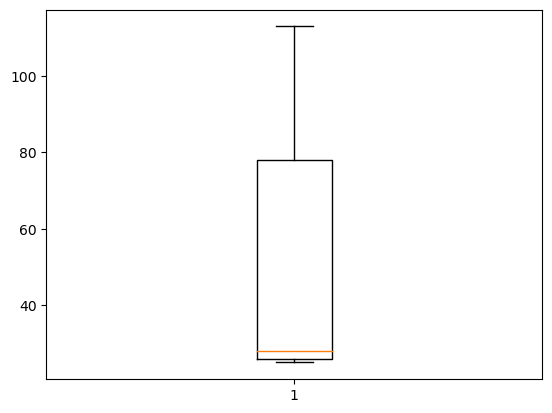

In [3]:
#Filling the missing values based on presence of outliers
df1=df.dropna()
import matplotlib.pyplot as plt
plt.boxplot(df1["country"])

In [4]:
df['country'] = df['country'].fillna(df['country'].mean())

{'whiskers': [<matplotlib.lines.Line2D at 0x2461f8872d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2461f894bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2461f886590>],
 'medians': [<matplotlib.lines.Line2D at 0x2461f896150>],
 'fliers': [<matplotlib.lines.Line2D at 0x2461f896bd0>],
 'means': []}

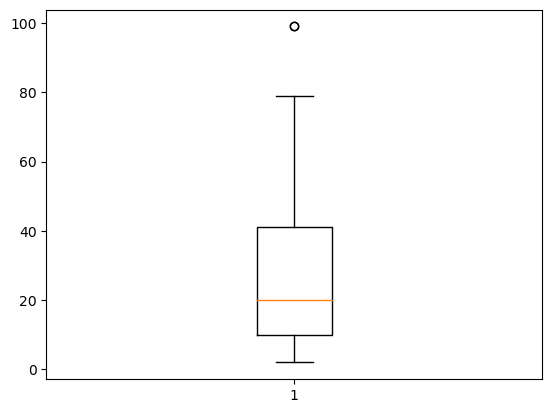

In [5]:
plt.boxplot(df1["application"])

In [6]:
df['application'] = df['application'].fillna(df['application'].median())

In [8]:
df=df.dropna(how = 'all')

In [20]:
df['material_ref'].fillna("unknown",inplace=True)

In [10]:
df['material_ref'].replace(to_replace="^0+[0-9]{7}",regex=True,value="unknown",inplace=True)

In [11]:
df["status"].mode()

0    Won
Name: status, dtype: object

In [12]:
df["status"]=df["status"].fillna("Won")

In [13]:
df["id"].fillna( method ='bfill', inplace = True)

In [38]:
df["quantity tons"].fillna( method ='bfill', inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x24620001a90>,
 'caps': [<matplotlib.lines.Line2D at 0x24620003250>,
 'boxes': [<matplotlib.lines.Line2D at 0x24620000fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x246200088d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x246200093d0>],
 'means': []}

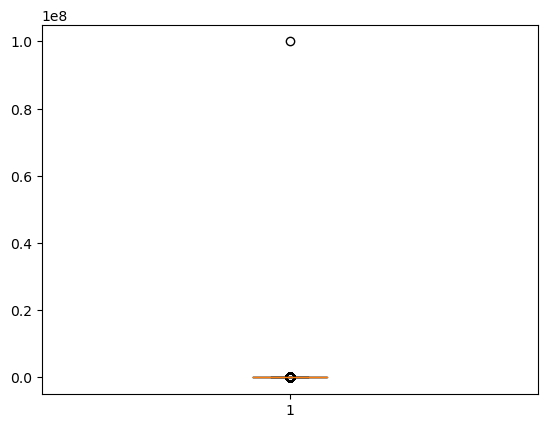

In [14]:
df2=df.dropna()
plt.boxplot(df2["selling_price"])

In [15]:
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].median())

In [16]:
df["customer"].fillna( method ='bfill', inplace = True)
df["item_date"].fillna( method ='bfill', inplace = True)
df["thickness"].fillna( method ='bfill', inplace = True)
df["delivery date"].fillna( method ='bfill', inplace = True)

In [21]:
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [22]:
#converting all the datatypes into numeric datatype
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
     

In [92]:

correction_columns=['quantity tons','thickness','width','selling_price']
for i in correction_columns:
    Q1=df[i].quantile(0.02)
    Q3=df[i].quantile(0.98)
    print('\n',i,' lower limit=',Q1,' upper limit=',Q3)



 quantity tons  lower limit= 1.36766919008  upper limit= 702.77338904

 thickness  lower limit= 0.4  upper limit= 12.0

 width  lower limit= 811.0  upper limit= 2000.0

 selling_price  lower limit= 432.0  upper limit= 1295.0


In [95]:

from scipy.stats.mstats import winsorize
correction_columns=['quantity tons','thickness','width','selling_price']
for i in correction_columns:
    df[i]=winsorize(df[i],(0.02,0.02))

In [96]:
#Numeric data into categorical data
df["item type"].unique()
replace1={"item type":{'W':0, 'WI':1, 'S':2, 'Others':3, 'PL':4, 'IPL':5, 'SLAWR':6}}
df=df.replace(replace1)

In [97]:
x=df[['quantity tons','customer','item type','country','application','thickness','width','product_ref','delivery date']].values
y=df[['selling_price']].values

In [98]:
from sklearn.preprocessing import StandardScaler
import pickle
# fit scaler on training data
scaler = StandardScaler().fit(x)

#saving pickle file for scaling
pickle.dump(scaler, open('scaling_regression.pkl', 'wb'))

# transform training data
x = scaler.transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x,y.reshape(-1),test_size=0.3)

In [103]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=53)
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
importances=model.feature_importances_

for i,v in zip(['quantity tons','customer','item type','country','application','thickness','width','product_ref','delivery date'], importances):
    print('Feature:'',Score: ',(i,v))
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred))
print('R2 Score: ', r2_score(Y_test, Y_pred))


Feature:,Score:  ('quantity tons', 0.06957083028917165)
Feature:,Score:  ('customer', 0.071079508693963)
Feature:,Score:  ('item type', 0.006664754727260268)
Feature:,Score:  ('country', 0.04524766330822701)
Feature:,Score:  ('application', 0.017479065017818193)
Feature:,Score:  ('thickness', 0.0496960548731755)
Feature:,Score:  ('width', 0.02307033762277256)
Feature:,Score:  ('product_ref', 0.3399263325416511)
Feature:,Score:  ('delivery date', 0.3772654529259608)
Mean squared error:  6594.836450811617
Mean absolute error:  39.18340391047249
R2 Score:  0.8323018994024936


In [107]:
#for classification model
status1=df.loc[df["status"].isin([7,1])]
status1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,51,3,7,0,4,2.0,1500.0,5267,24,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,702.773719,288,0,7,0,17,0.8,1210.0,11375,22,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,39,4,7,1,12,0.4,952.0,9571,5,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,955,5,7,2,21,2.3,1317.0,5541,22,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,702.773719,397,3,7,0,4,4.0,2000.0,1798,8,20210301.0,577.00


In [109]:
status1['status'] = le.fit_transform(status1['status'])

C:\Users\aditi\AppData\Local\Temp\ipykernel_8324\2172499870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status1['status'] = le.fit_transform(status1['status'])


<Axes: xlabel='status'>

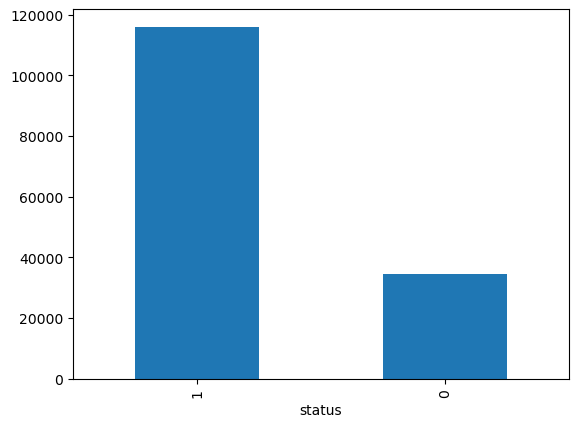

In [117]:
status1['status'].value_counts().plot(kind='bar')
     

In [111]:
x=status1[['quantity tons','item type','country','application','thickness','width', 'product_ref','selling_price','delivery date']].values
y=status1[['status']].values
     

In [113]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=888)
x, y = smote.fit_resample(x, y)


In [115]:
# data normalization with sklearn
# standard scaler -> StandardScaler() - -1 to 1 or MinMaxScaler() - 0 to 1
from sklearn.preprocessing import StandardScaler

# fit scaler on training data
scaler = StandardScaler().fit(x)

#saving pickle file for scaling
pickle.dump(scaler, open('scaling_Classification.pkl', 'wb'))

# transform training data
x = scaler.transform(x)

#spliting train and test
X_train, X_test, Y_train, Y_test = train_test_split(x,y.reshape(-1),test_size=0.3)

In [121]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score,confusion_matrix, f1_score,roc_auc_score
rmodel = RandomForestClassifier(n_estimators=10)
rmodel.fit(X_train, Y_train)

# Test the RandomForestClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
accu

0.94729054131709

In [122]:
import pickle
filename = 'regression_model.sav'
pickle.dump(model, open(filename, 'wb'))
 

In [123]:

filename = 'classification_model.sav'
pickle.dump(rmodel, open(filename, 'wb'))

In [126]:
status1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,51,3,1,0,4,2.00,1500.0,5267,24,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,702.773719,288,0,1,0,17,0.80,1210.0,11375,22,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,39,4,1,1,12,0.40,952.0,9571,5,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,955,5,1,2,21,2.30,1317.0,5541,22,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,702.773719,397,3,1,0,4,4.00,2000.0,1798,8,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,223,0,1,0,17,0.96,1220.0,11375,9,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,223,0,1,0,17,0.95,1500.0,11375,9,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,223,0,1,0,17,0.71,1250.0,11375,9,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,1.367440,223,0,1,0,17,0.85,1250.0,11375,9,20200701.0,601.00
